In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_csv('dmart.csv')

In [3]:
print(df.head(10))
print(df.tail(10))

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
5      1     1  2010-03-12      21043.39      False
6      1     1  2010-03-19      22136.64      False
7      1     1  2010-03-26      26229.21      False
8      1     1  2010-04-02      57258.43      False
9      1     1  2010-04-09      42960.91      False
      Store  Dept        Date  Weekly_Sales  IsHoliday
1991      1    14  2012-08-17      12419.06      False
1992      1    14  2012-08-24      11041.63      False
1993      1    14  2012-08-31      12912.96      False
1994      1    14  2012-09-07      13711.08       True
1995      1    14  2012-09-14      11596.10      False
1996      1    14  2012-09-21      12193.80      False
1997      1    14  2012-09-28      12037.66

In [4]:
ts= df['Weekly_Sales']

<Axes: >

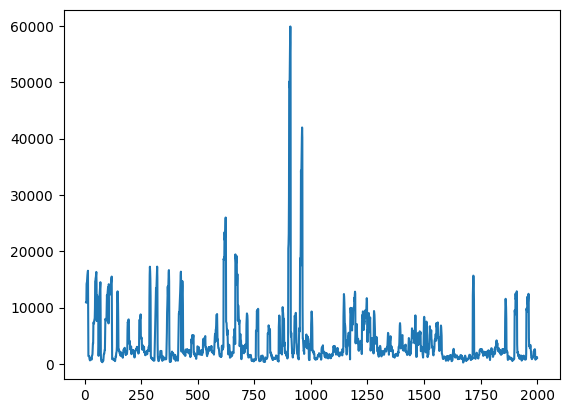

In [5]:
ts.rolling(7).std().plot() #7 because dealing with weekly data

<Axes: >

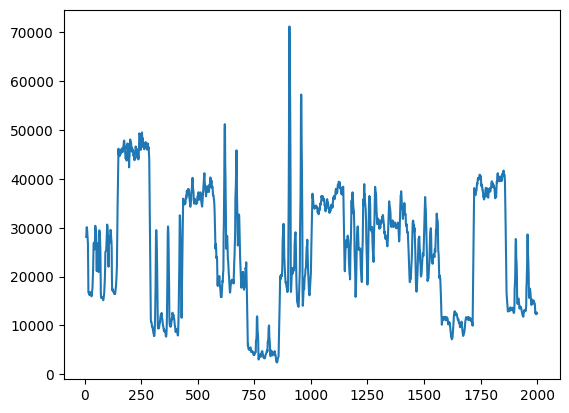

In [6]:
ts.rolling(7).mean().plot()

In [7]:
df['Date']=pd.to_datetime(df['Date'])
print(df.head())
print(df.tail())
df.set_index(['Date'],inplace=True)  #we need data based on Month so we are making it as an index for easy use 
print(df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False
      Store  Dept       Date  Weekly_Sales  IsHoliday
1996      1    14 2012-09-21      12193.80      False
1997      1    14 2012-09-28      12037.66      False
1998      1    14 2012-10-05      14381.21      False
1999      1    14 2012-10-12      11450.64      False
2000      1    14 2012-10-19      12035.51      False
            Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1      24924.50      False
2010-02-12      1     1      46039.49       True
2010-02-19      1     1      41595.55      False
2010-02-26      1     1      19403.54      False
2010-03-05      1     1      21827.90      False


<Axes: xlabel='Date'>

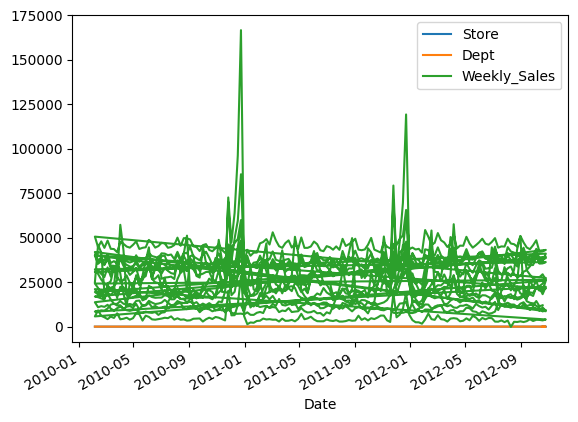

In [8]:
df.plot()

In [9]:
pvalue=adfuller(ts)
print(pvalue)

(-3.3889290330790134, 0.011342119833868895, 23, 1977, {'1%': -3.433661993406868, '5%': -2.8630030510232647, '10%': -2.567548867394869}, 40369.33552568077)


In [10]:
ts2=df['Weekly_Sales']
df['First Diff']=ts2-ts2.shift(1)
r=adfuller(df['First Diff'].dropna())
r

(-13.66041140538516,
 1.525232702428757e-25,
 23,
 1976,
 {'1%': -3.4336636717018405,
  '5%': -2.8630037919874423,
  '10%': -2.567549261922421},
 40358.77439124846)

In [11]:
df['Seasonal Diff']=ts2-ts2.shift(7)
r=adfuller(df['Seasonal Diff'].dropna())
r

(-10.094330218252097,
 1.1009914340186096e-17,
 26,
 1967,
 {'1%': -3.4336788532475775,
  '5%': -2.8630104945933974,
  '10%': -2.567552830738709},
 40610.89856346367)

In [12]:
import statsmodels.api as sm

In [13]:
model = sm.tsa.statespace.SARIMAX(df['Weekly_Sales'], order=(0,1,0), seasonal_order=(1,1,1,52))


/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
res=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01018D+01    |proj g|=  1.12368D-01


 This problem is unconstrained.



At iterate    5    f=  1.00196D+01    |proj g|=  1.03696D-02

At iterate   10    f=  1.00160D+01    |proj g|=  2.58520D-04

At iterate   15    f=  1.00159D+01    |proj g|=  3.71376D-05

At iterate   20    f=  1.00156D+01    |proj g|=  1.12142D-02

At iterate   25    f=  9.99865D+00    |proj g|=  4.16506D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     32      1     0     0   5.915D-06   9.999D+00
  F =   9.9986293998920903     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [25]:
predict=res.predict(start=1500,end=2000)

<Axes: xlabel='Date'>

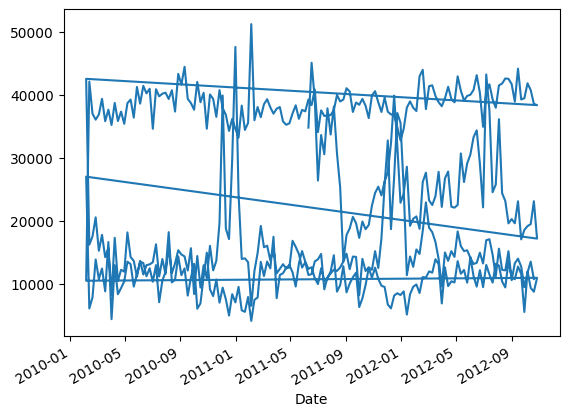

In [26]:
predict.plot()

In [27]:
df
print(df.describe())

        Store         Dept   Weekly_Sales     First Diff  Seasonal Diff
count  2001.0  2001.000000    2001.000000    2000.000000    1994.000000
mean      1.0     7.496752   25479.814758      -6.444495     -54.947347
std       0.0     4.030523   13737.618740    7426.510724   11742.002072
min       1.0     1.000000    -139.650000 -139264.660000 -145528.660000
25%       1.0     4.000000   14092.030000   -1663.317500   -3153.930000
50%       1.0     7.000000   24213.180000      14.260000    -158.785000
75%       1.0    11.000000   36222.740000    1735.135000    2872.407500
max       1.0    14.000000  166697.720000   70499.600000  147561.140000


In [28]:
training=df.iloc[0:1400,:]
testing=df.iloc[1400:1900,:]

In [29]:
training.describe()


,Store,Dept,Weekly_Sales,First Diff,Seasonal Diff
count,1400.0,1400.000000,1400.000000,1399.000000,1393.000000
mean,1.0,5.403571,26614.698464,13.433560,46.870309
std,0.0,2.826529,14434.842473,8406.349448,13183.760120
min,1.0,1.000000,-139.650000,-139264.660000,-145528.660000
25%,1.0,3.000000,16350.235000,-1700.315000,-3290.090000
50%,1.0,5.000000,26816.645000,13.060000,-115.860000
75%,1.0,8.000000,36427.687500,1877.865000,3308.330000
max,1.0,10.000000,166697.720000,70499.600000,147561.140000


In [30]:
testing.describe()

,Store,Dept,Weekly_Sales,First Diff,Seasonal Diff
count,500.0,500.000000,500.000000,500.000000,500.000000
mean,1.0,12.044000,24234.496960,-59.761780,-344.425180
std,0.0,1.067869,11831.047692,3845.067964,6927.099153
min,1.0,10.000000,6605.120000,-19045.570000,-27628.630000
25%,1.0,11.000000,12177.180000,-1496.797500,-2860.825000
50%,1.0,12.000000,23265.065000,22.170000,-176.740000
75%,1.0,13.000000,36760.897500,1440.422500,2270.407500
max,1.0,14.000000,44863.150000,33310.880000,31485.210000


<Axes: xlabel='Date'>

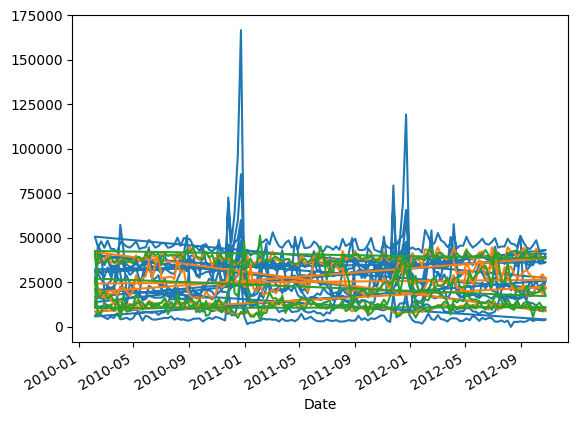

In [31]:
training['Weekly_Sales'].plot()
testing['Weekly_Sales'].plot()
predict.plot()

In [32]:
from sklearn.metrics import mean_absolute_error

# Assuming model is already trained
# Splitting data
training=df.iloc[0:1400,:]
testing=df.iloc[1400:1900,:]





In [39]:
mae=mean_absolute_error(testing["Weekly_Sales"],predict[0:500])
mae=mae*0.001
mae

14.572286579026795

<Axes: xlabel='Date'>

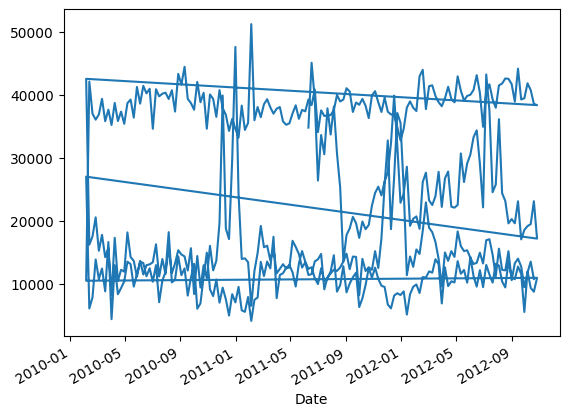

In [34]:
#predict.shape()
predict_shape = predict.shape
predict.plot()